<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2025/blob/main/AI_2025_CNN_INTRO_class_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First HandsOn with CNN!

Slide for the day with the Task Description ([SLIDE](https://docs.google.com/presentation/d/1DCZn-I8bXQ_awkmR6I6u9be4MCHB0ljWTxBL9koOsXo/edit?usp=sharing))




# Connect your drive!

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# Go to the RiNNgs folder!
use the command "cd" to  change directory


```
cd "directory"
```


then use "ls" (list) to show the files in the folder

## Are you in the correct directory?


In [ ]:
!cd /content/gdrive/MyDrive/RiNNgs # this one may be different from mine

# What's in the directory you are in?



In [ ]:
ls

gdrive/  sample_data/


In [ ]:
# we need to get some files from github
import os
success = os.path.exists("./data_preprocess.py")
if not success:

  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py

--2025-05-08 11:12:37--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14603 (14K) [text/plain]
Saving to: ‘data_preprocess.py’

data_preprocess.py  100%[===================>]  14.26K  --.-KB/s    in 0.001s  

2025-05-08 11:12:38 (9.86 MB/s) - ‘data_preprocess.py’ saved [14603/14603]



In [ ]:
ls

data_preprocess.py  gdrive/  sample_data/


# Lets create all the folders needed

In [ ]:
import os
def CreateDir(path):
	# Create a directory if it does not exist
	success = os.path.exists(path)
	if not success:
		os.makedirs(path)
CreateDir("results")#
CreateDir("results/display")
CreateDir("results/preprocess")
CreateDir("data")

In [ ]:
success = os.path.exists("data/event_08011.file")
if not success:
  ! wget  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file -P data/
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/data_08011.json

--2025-05-08 11:12:43--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375770 (367K) [application/octet-stream]
Saving to: ‘data/event_08011.file’

event_08011.file    100%[===================>] 366.96K  --.-KB/s    in 0.05s   

2025-05-08 11:12:44 (7.75 MB/s) - ‘data/event_08011.file’ saved [375770/375770]

--2025-05-08 11:12:44--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

# We need to build the dataset.
How can we call a python code from a notebook script?

Use the command


```
! python script.py ARG1,ARG2,...,ARGN
```

to call the "data_preprocess.py" that will find the run 0811 and form 16x16 images from it.

arguments are "08011 Conv 16 np_reco 0"

**Ignore all the warnings and the tensorflow calls. This function is doing a lot more than what we need**

In [ ]:
! python data_preprocess.py 08011 Conv 16 np_reco 0

2025-05-08 11:12:51.743129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746702771.768613     903 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746702771.776482     903 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-08 11:12:51.802593: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
*************************
*  Data Pre-Processing  *
*************************
Dataset = 08011
Model   = Conv
Size    = 16
Lab

# Where are our files?

The script will write two files in the results/preprocess folder that we created before.

Check if you can find the files and that  *x_all_** is the rigth size (around 40 MB)

Use the command


```
ls -lh "path"
```



In [ ]:
! ls -lh  results/preprocess/

total 40M
-rw-r--r-- 1 root root  38K May  8 11:13 prova16.pdf
-rw-r--r-- 1 root root  40M May  8 11:13 x_all_08011.npy
-rw-r--r-- 1 root root 626K May  8 11:13 y_all_08011.npy


# Read the data, check the data format, print an element.


*   Load the data with np.load
*   Print the data shape
*   Check the variable type
*   Use plt.matshow() to print an element



In [ ]:
import numpy as np
dataset = "08011"
x_all =  np.load( 'results/preprocess/' + 'x_all_{}.npy'.format(dataset))
y_all = np.load('results/preprocess/' + 'y_all_{}.npy'.format(dataset))


In [ ]:
#PRINT INFO ABOUT THE DATASET
#REPLACEME
print(x_all.shape)
type(x_all[0,0,0])

(20000, 16, 16)


numpy.float64

[0. 1. 2.]


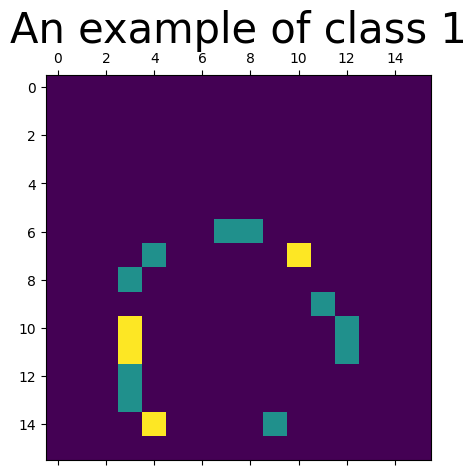

In [ ]:
import matplotlib.pyplot as plt
to_plot = 10
def plot_example(image,lab):
  f,ax = plt.subplots(1,1,figsize=(5,5))
  ax.matshow(image)
  ax.set_title("An example of class {}".format(np.argmax(lab)),fontsize=30)
  print(np.unique(image))
plot_example(x_all[to_plot,:,:],y_all[to_plot])